# Flower Image Recognition Program

#### Using ImageAI
##### By: Jennifer Smiley

Importing  the ImageAI pack that has dependancies on Tensorflow, Karas, OpenCSV, and Numpy

In [7]:
from imageai.Prediction.Custom import ModelTraining

Line one below defines what type of training, the second line defines the network type, and the third line sets the path
to the images in my folder. 

The folder is named flower and inside I have it separated into train and test folders.
Both folders have 5 folders inside with the names of the flowers as instructed by the ImageAI documentation. Then the photos
for each flower are inside their correponding folder. About 80% of the data is in the training folder and the remaining 
20% is in the testing folder. 

The last line, in theory, should start the training process. 

num_objects: the number of object types in the folder.
    
num_experiments: the number of times the network will train over all the training images, which is also called epochs
    
enhance_data = True: Is used to state if you want the network to produce modified copies of the 
    training images for better performance.

batch_size: Is to state the number of images the network will process at ones. The images are processed in batches until they are exhausted per each experiment performed.

show_network_summary = True: If you want to see the output of the training process.

Unfortunatly, I am having an error with their code on line 4. Which is stopping the code from creating a .json file which
will be needed in the second part of the code. 
FIXED: See below.

In [3]:
model_trainer = ModelTraining()
model_trainer.setModelTypeAsResNet()
model_trainer.setDataDirectory("C:/Users/athen/Documents/CDS 490/flower")
#model_trainer.trainModel(num_objects=1, num_experiments=100, enhance_data=True, batch_size=32, show_network_summary=True)

In [4]:
model_trainer.trainModel(num_objects=5, num_experiments=100, enhance_data=True, batch_size=32, show_network_summary=True)

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1 (BatchNo (None, 112, 112, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 112, 112, 64) 0           batch_normalization_v1[0][0]     
_____________________________________

Found 3456 images belonging to 5 classes.
Found 867 images belonging to 5 classes.
JSON Mapping for the model classes saved to  C:/Users/athen/Documents/CDS 490/flower\json\model_class.json
Number of experiments (Epochs) :  100
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
28/28 [==============================] - 133s 5s/step - loss: 1.6251 - acc: 0.2191

Epoch 00001: val_acc improved from -inf to 0.21915, saving model to C:/Users/athen/Documents/CDS 490/flower\models\model_ex-001_acc-0.219146.h5
108/108 [==============================] - 7459s 69s/step - loss: 2.0323 - acc: 0.3987 - val_loss: 1.6251 - val_acc: 0.2191
Epoch 2/100
28/28 [==============================] - 130s 5s/step - loss: 1.6928 - acc: 0.2907

Epoch 00002: val_acc improved from 0.21915 to 0.29066, saving model to C:/Users/athen/Documents/CDS 490/flower\models\model_ex-002_acc-0.290657.h5
108/108 [==============================] - 7674s 71s/step - loss: 1.4161 - acc: 0.5133 - val_loss: 1.6928 - val_acc: 

28/28 [==============================] - 164s 6s/step - loss: 0.9692 - acc: 0.7278

Epoch 00053: val_acc did not improve from 0.73126
108/108 [==============================] - 9797s 91s/step - loss: 0.2169 - acc: 0.9219 - val_loss: 0.9692 - val_acc: 0.7278
Epoch 54/100
28/28 [==============================] - 165s 6s/step - loss: 1.1583 - acc: 0.7082

Epoch 00054: val_acc did not improve from 0.73126
108/108 [==============================] - 9813s 91s/step - loss: 0.2248 - acc: 0.9164 - val_loss: 1.1583 - val_acc: 0.7082
Epoch 55/100
28/28 [==============================] - 171s 6s/step - loss: 1.0838 - acc: 0.6851

Epoch 00055: val_acc did not improve from 0.73126
108/108 [==============================] - 10029s 93s/step - loss: 0.2093 - acc: 0.9271 - val_loss: 1.0838 - val_acc: 0.6851
Epoch 56/100
28/28 [==============================] - 185s 7s/step - loss: 1.0320 - acc: 0.7186

Epoch 00056: val_acc did not improve from 0.73126
108/108 [==============================] - 10120s 94

I was able to get the above code running. It does take quite a long time to run. Each Epoch takes about 2 hours to run so the above code will take a few days. But I believe that is just the nature of image detection algorithms. The algorithm is working as the loss score continues to decrease and the acc. score has been increasing. I do believe this is the algorithm I will continue to use. 

My problem was the definition of num_objects was not what I thought it was. I thought it was the number of image types in your folder, based on the language they used in their definition, but it is the number of categories for your image detection, in my case the types of flowers. 

I do still need to work on the below code now that I have gotten the above code working.


In [1]:
import os # needed for the second part of the code
from imageai.Prediction.Custom import CustomImagePrediction

In [36]:
#Example code from ImageAI's github. Will need to change once I can get the above code working to fit my data. 

execution_path = os.getcwd()

prediction = CustomImagePrediction()
prediction.setModelTypeAsResNet()
prediction.setModelPath(os.path.join(execution_path, "flower\models\model_ex-046_acc-0.731257.h5"))  # <- needs to change 
prediction.setJsonPath(os.path.join(execution_path, "flower\json\model_class.json"))  # <- needs to change
prediction.loadModel(num_objects=5)  # <- needs to change to 5 I believe

predictions, probabilities = prediction.predictImage(os.path.join(execution_path, "flower\\test\\daisy-test\\28056118836_77a6847d94_n.jpg"), result_count=5)
#predictions, probabilities = prediction.predictImage(("C:\\Users\\athen\\Documents\\CDS 490\\flower\\test\\daisy-test\\28056118836_77a6847d94_n.jpg"), result_count=5)


In [37]:
print(type(predictions))
print(type(probabilities))

<class 'list'>
<class 'list'>


In [5]:
from IPython.display import display
from PIL import Image

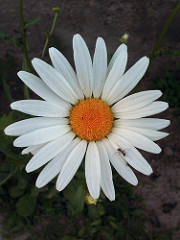

daisy-train : 99.95844960212708
tulip-train : 0.033258748590014875
rose-train : 0.005518586840480566
sunflower-train : 0.0027578926165006123
dandelion-train : 1.8371453336385457e-05


In [49]:
display(Image.open("C:\\Users\\athen\\Documents\\CDS 490\\flower\\test\\daisy-test\\28056118836_77a6847d94_n.jpg"))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)
    #print(type(eachPrediction))
    #print(type(eachProb))

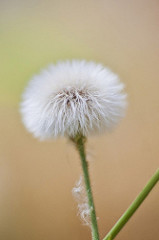

dandelion-train : 54.96392846107483
daisy-train : 38.34872841835022
tulip-train : 4.446418583393097
rose-train : 2.237013913691044
sunflower-train : 0.003909058068529703


In [50]:
execution_path = os.getcwd()

prediction = CustomImagePrediction()
prediction.setModelTypeAsResNet()
prediction.setModelPath(os.path.join(execution_path, "flower\models\model_ex-046_acc-0.731257.h5"))  # <- needs to change 
prediction.setJsonPath(os.path.join(execution_path, "flower\json\model_class.json"))  # <- needs to change
prediction.loadModel(num_objects=5)  # <- needs to change to 5 I believe

predictions, probabilities = prediction.predictImage(os.path.join(execution_path, "flower\\test\\dandelion-test\\22196426956_eca94f6faa_m.jpg"), result_count=5)

display(Image.open("C:\\Users\\athen\\Documents\\CDS 490\\flower\\test\\dandelion-test\\22196426956_eca94f6faa_m.jpg"))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

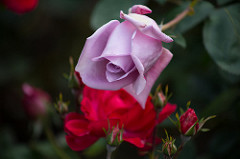

rose-train : 98.45470786094666
tulip-train : 1.542095374315977
daisy-train : 0.002746044992818497
dandelion-train : 0.0002905067276515183
sunflower-train : 0.0001576021077198675


In [51]:
execution_path = os.getcwd()

prediction = CustomImagePrediction()
prediction.setModelTypeAsResNet()
prediction.setModelPath(os.path.join(execution_path, "flower\models\model_ex-046_acc-0.731257.h5"))  # <- needs to change 
prediction.setJsonPath(os.path.join(execution_path, "flower\json\model_class.json"))  # <- needs to change
prediction.loadModel(num_objects=5)  # <- needs to change to 5 I believe

image_path = os.path.join(execution_path, "flower\\test\\rose-test\\15996816031_7f2fea25cb_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

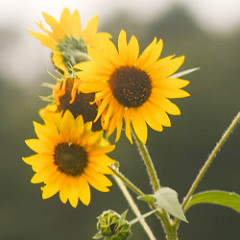

sunflower-train : 98.33568334579468
dandelion-train : 1.5293828211724758
tulip-train : 0.1286087790504098
rose-train : 0.00502066504850518
daisy-train : 0.00130811968119815


In [52]:
prediction = CustomImagePrediction()
prediction.setModelTypeAsResNet()
prediction.setModelPath(os.path.join(execution_path, "flower\models\model_ex-046_acc-0.731257.h5"))  # <- needs to change 
prediction.setJsonPath(os.path.join(execution_path, "flower\json\model_class.json"))  # <- needs to change
prediction.loadModel(num_objects=5)  # <- needs to change to 5 I believe

image_path = os.path.join(execution_path, "flower\\test\\sunflower-test\\15218421476_9d5f38e732_m.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

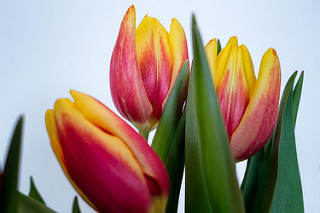

tulip-train : 99.80058073997498
sunflower-train : 0.1890654442831874
daisy-train : 0.009446630429010838
rose-train : 0.0006368165031744866
dandelion-train : 0.0002759005610641907


In [53]:
prediction = CustomImagePrediction()
prediction.setModelTypeAsResNet()
prediction.setModelPath(os.path.join(execution_path, "flower\models\model_ex-046_acc-0.731257.h5"))  # <- needs to change 
prediction.setJsonPath(os.path.join(execution_path, "flower\json\model_class.json"))  # <- needs to change
prediction.loadModel(num_objects=5)  # <- needs to change to 5 I believe

image_path = os.path.join(execution_path, "flower\\test\\tulip-test\\16309287412_5cc4d58bd1_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

### Daisies

In [3]:
execution_path = os.getcwd()

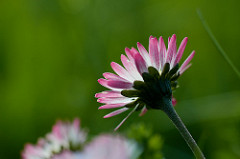

daisy-train : 83.55408906936646
rose-train : 11.358138918876648
tulip-train : 3.7528928369283676
dandelion-train : 1.3096990995109081
sunflower-train : 0.025188736617565155


In [7]:
prediction = CustomImagePrediction()
prediction.setModelTypeAsResNet()
prediction.setModelPath(os.path.join(execution_path, "flower\models\model_ex-046_acc-0.731257.h5"))  # <- needs to change 
prediction.setJsonPath(os.path.join(execution_path, "flower\json\model_class.json"))  # <- needs to change
prediction.loadModel(num_objects=5)  # <- needs to change to 5 I believe

image_path = os.path.join(execution_path, "flower\\test\\daisy-test\\34540176411_a35a19a8ef_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

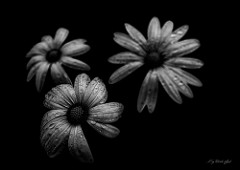

rose-train : 92.69314408302307
tulip-train : 4.335757717490196
dandelion-train : 1.581481657922268
daisy-train : 1.2025244534015656
sunflower-train : 0.18709838623180985


In [9]:
prediction = CustomImagePrediction()
prediction.setModelTypeAsResNet()
prediction.setModelPath(os.path.join(execution_path, "flower\models\model_ex-046_acc-0.731257.h5"))  # <- needs to change 
prediction.setJsonPath(os.path.join(execution_path, "flower\json\model_class.json"))  # <- needs to change
prediction.loadModel(num_objects=5)  # <- needs to change to 5 I believe

image_path = os.path.join(execution_path, "flower\\test\\daisy-test\\33885735373_444ba02d9c_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

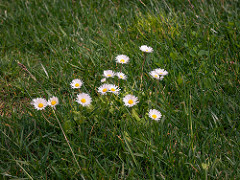

daisy-train : 99.30621981620789
tulip-train : 0.38373321294784546
dandelion-train : 0.23525154683738947
sunflower-train : 0.04092490125913173
rose-train : 0.03386509488336742


In [10]:
prediction = CustomImagePrediction()
prediction.setModelTypeAsResNet()
prediction.setModelPath(os.path.join(execution_path, "flower\models\model_ex-046_acc-0.731257.h5"))  # <- needs to change 
prediction.setJsonPath(os.path.join(execution_path, "flower\json\model_class.json"))  # <- needs to change
prediction.loadModel(num_objects=5)  # <- needs to change to 5 I believe

image_path = os.path.join(execution_path, "flower\\test\\daisy-test\\33819069114_6ecc240b54_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

###  Dandelions

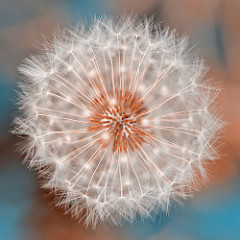

dandelion-train : 99.11531805992126
rose-train : 0.6619967985898256
daisy-train : 0.17154555534943938
tulip-train : 0.05095223896205425
sunflower-train : 0.00018344168211115175


In [11]:
prediction = CustomImagePrediction()
prediction.setModelTypeAsResNet()
prediction.setModelPath(os.path.join(execution_path, "flower\models\model_ex-046_acc-0.731257.h5"))  # <- needs to change 
prediction.setJsonPath(os.path.join(execution_path, "flower\json\model_class.json"))  # <- needs to change
prediction.loadModel(num_objects=5)  # <- needs to change to 5 I believe

image_path = os.path.join(execution_path, "flower\\test\\dandelion-test\\19526570282_1d1e71b0f3_m.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

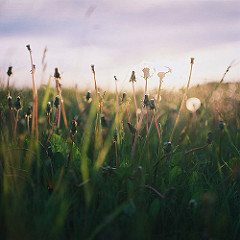

dandelion-train : 52.02493071556091
tulip-train : 46.26906216144562
daisy-train : 1.5355282463133335
sunflower-train : 0.12583071365952492
rose-train : 0.044638244435191154


In [12]:
prediction = CustomImagePrediction()
prediction.setModelTypeAsResNet()
prediction.setModelPath(os.path.join(execution_path, "flower\models\model_ex-046_acc-0.731257.h5"))  # <- needs to change 
prediction.setJsonPath(os.path.join(execution_path, "flower\json\model_class.json"))  # <- needs to change
prediction.loadModel(num_objects=5)  # <- needs to change to 5 I believe

image_path = os.path.join(execution_path, "flower\\test\\dandelion-test\\19551343814_48f764535f_m.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

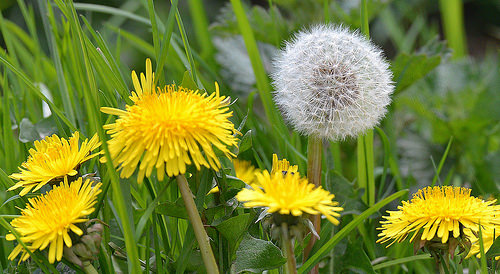

dandelion-train : 99.32531714439392
tulip-train : 0.4368565510958433
daisy-train : 0.22061788477003574
sunflower-train : 0.016465550288558006
rose-train : 0.000748897400626447


In [13]:
prediction = CustomImagePrediction()
prediction.setModelTypeAsResNet()
prediction.setModelPath(os.path.join(execution_path, "flower\models\model_ex-046_acc-0.731257.h5"))  # <- needs to change 
prediction.setJsonPath(os.path.join(execution_path, "flower\json\model_class.json"))  # <- needs to change
prediction.loadModel(num_objects=5)  # <- needs to change to 5 I believe

image_path = os.path.join(execution_path, "flower\\test\\dandelion-test\\19812060274_c432f603db.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

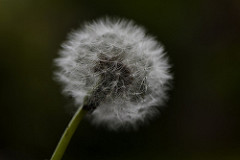

dandelion-train : 99.18022751808167
daisy-train : 0.7915870286524296
rose-train : 0.024826513254083693
tulip-train : 0.0033086547773564234
sunflower-train : 4.565603717310296e-05


In [14]:
image_path = os.path.join(execution_path, "flower\\test\\dandelion-test\\33878004304_a7c823115b_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

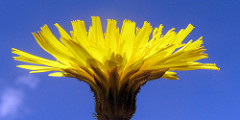

sunflower-train : 87.17445135116577
dandelion-train : 12.687049806118011
tulip-train : 0.13748991768807173
daisy-train : 0.0009170347766485065
rose-train : 0.00010069193194794934


In [15]:
image_path = os.path.join(execution_path, "flower\\test\\dandelion-test\\34351602790_37234e2dae_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

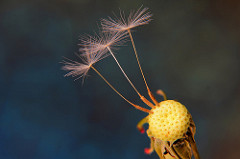

dandelion-train : 97.73560762405396
rose-train : 1.143722701817751
daisy-train : 0.7123210001736879
tulip-train : 0.36775863263756037
sunflower-train : 0.04059110360685736


In [16]:
image_path = os.path.join(execution_path, "flower\\test\\dandelion-test\\34578947551_863af3acb3_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

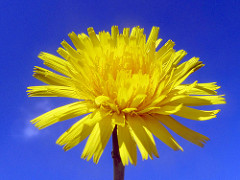

dandelion-train : 95.57157754898071
sunflower-train : 4.139360412955284
tulip-train : 0.2784827956929803
daisy-train : 0.009923635661834851
rose-train : 0.0006624693469348131


In [17]:
image_path = os.path.join(execution_path, "flower\\test\\dandelion-test\\34351608230_f95038a5a4_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

### Sunflowers

In [18]:
prediction = CustomImagePrediction()
prediction.setModelTypeAsResNet()
prediction.setModelPath(os.path.join(execution_path, "flower\models\model_ex-046_acc-0.731257.h5"))  # <- needs to change 
prediction.setJsonPath(os.path.join(execution_path, "flower\json\model_class.json"))  # <- needs to change
prediction.loadModel(num_objects=5)  # <- needs to change to 5 I believe

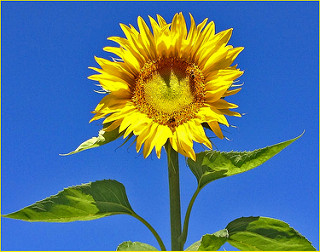

sunflower-train : 99.13430213928223
dandelion-train : 0.8620016276836395
tulip-train : 0.003560352706699632
daisy-train : 7.765623308841896e-05
rose-train : 5.883552489649446e-05


In [19]:
image_path = os.path.join(execution_path, "flower\\test\\sunflower-test\\14925398301_55a180f919_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

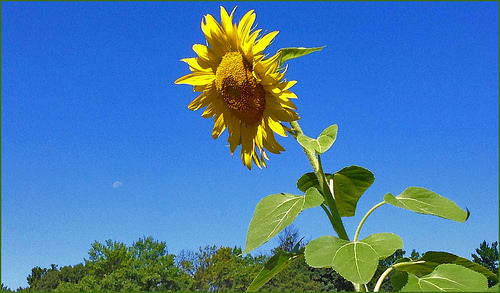

sunflower-train : 99.80260133743286
dandelion-train : 0.1155889593064785
tulip-train : 0.06856705876998603
daisy-train : 0.009640247299103066
rose-train : 0.0036087549233343452


In [20]:
image_path = os.path.join(execution_path, "flower\\test\\sunflower-test\\14925397761_46ecfa24e0.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

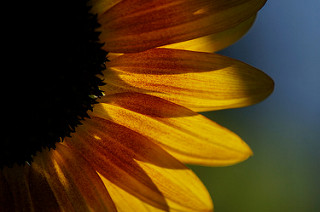

rose-train : 62.02645301818848
sunflower-train : 33.88713300228119
tulip-train : 2.26709321141243
dandelion-train : 1.626015082001686
daisy-train : 0.19330912036821246


In [21]:
image_path = os.path.join(execution_path, "flower\\test\\sunflower-test\\15042911059_b6153d94e7_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

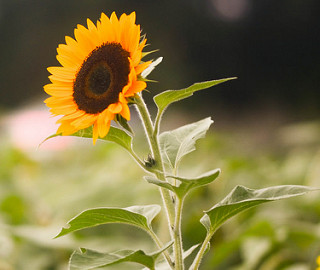

sunflower-train : 97.29409217834473
rose-train : 0.816042348742485
daisy-train : 0.7547031622380018
dandelion-train : 0.6126621272414923
tulip-train : 0.5225084722042084


In [22]:
image_path = os.path.join(execution_path, "flower\\test\\sunflower-test\\15054866898_60ee50ec6b_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

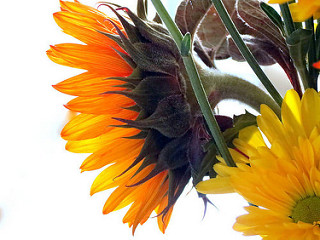

rose-train : 91.05774164199829
sunflower-train : 6.92429393529892
daisy-train : 1.0779072530567646
dandelion-train : 0.6715156137943268
tulip-train : 0.26854246389120817


In [23]:
image_path = os.path.join(execution_path, "flower\\test\\sunflower-test\\15118243470_7e0a7f159c_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

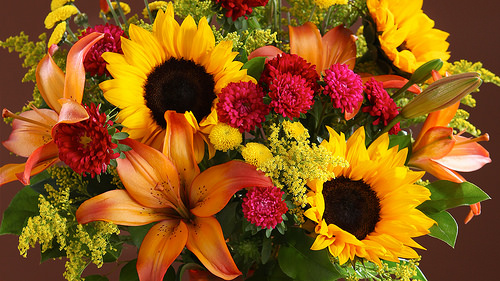

sunflower-train : 99.79718327522278
tulip-train : 0.1962680835276842
rose-train : 0.0060351820138748735
dandelion-train : 0.0004905517471343046
daisy-train : 2.2966001722579676e-05


In [24]:
image_path = os.path.join(execution_path, "flower\\test\\sunflower-test\\15122112402_cafa41934f.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

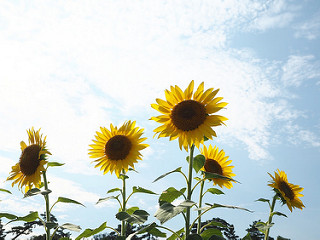

sunflower-train : 99.91359114646912
daisy-train : 0.055446993792429566
dandelion-train : 0.03065568453166634
tulip-train : 0.00029375419217103627
rose-train : 1.1950547218475549e-05


In [25]:
image_path = os.path.join(execution_path, "flower\\test\\sunflower-test\\15122871130_6a7d0b4372_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

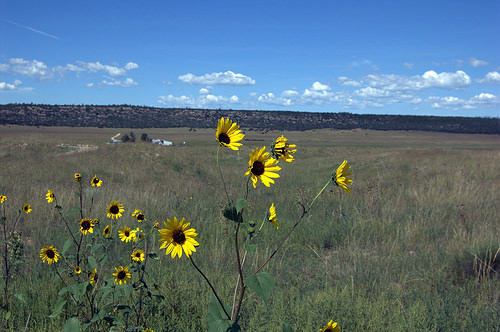

sunflower-train : 98.19700717926025
dandelion-train : 1.2968068942427635
tulip-train : 0.3509299596771598
daisy-train : 0.08848356083035469
rose-train : 0.06676281336694956


In [26]:
image_path = os.path.join(execution_path, "flower\\test\\sunflower-test\\15218871222_c104032ca1.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

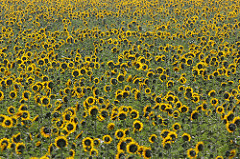

sunflower-train : 87.23157048225403
dandelion-train : 8.18551629781723
tulip-train : 4.522004723548889
daisy-train : 0.04341796739026904
rose-train : 0.017493736231699586


In [28]:
image_path = os.path.join(execution_path, "flower\\test\\sunflower-test\\15443139789_5318389b8c_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

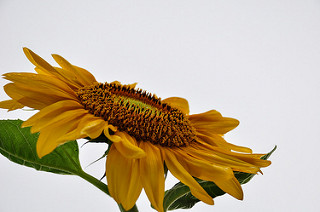

sunflower-train : 99.47181344032288
daisy-train : 0.5054874811321497
dandelion-train : 0.012531520042102784
tulip-train : 0.008842861279845238
rose-train : 0.0013201727597333957


In [29]:
image_path = os.path.join(execution_path, "flower\\test\\sunflower-test\\19359539074_d7e32e6616_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

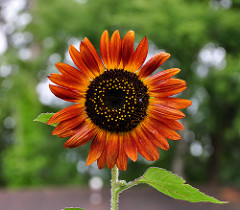

sunflower-train : 99.6289849281311
rose-train : 0.16360979061573744
tulip-train : 0.12756127398461103
dandelion-train : 0.06456502596847713
daisy-train : 0.015285251720342785


In [30]:
image_path = os.path.join(execution_path, "flower\\test\\sunflower-test\\19710925313_31682fa22b_m.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

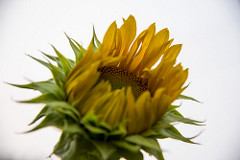

daisy-train : 87.73471117019653
sunflower-train : 11.275263130664825
tulip-train : 0.6100880447775126
rose-train : 0.19599141087383032
dandelion-train : 0.18394928192719817


In [31]:
image_path = os.path.join(execution_path, "flower\\test\\sunflower-test\\34572755322_b43e90cae2_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

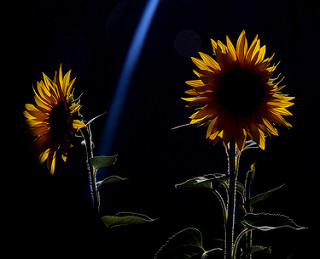

sunflower-train : 85.02619862556458
dandelion-train : 14.853005111217499
daisy-train : 0.08089201292023063
rose-train : 0.02354626194573939
tulip-train : 0.016356217383872718


In [32]:
image_path = os.path.join(execution_path, "flower\\test\\sunflower-test\\15266715291_dfa3f1d49f_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

### Roses

In [33]:
prediction = CustomImagePrediction()
prediction.setModelTypeAsResNet()
prediction.setModelPath(os.path.join(execution_path, "flower\models\model_ex-046_acc-0.731257.h5"))  # <- needs to change 
prediction.setJsonPath(os.path.join(execution_path, "flower\json\model_class.json"))  # <- needs to change
prediction.loadModel(num_objects=5)  # <- needs to change to 5 I believe

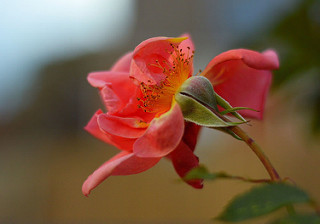

rose-train : 94.99319791793823
tulip-train : 4.977105557918549
daisy-train : 0.01613707863725722
sunflower-train : 0.012105655332561582
dandelion-train : 0.0014504408682114445


In [34]:
image_path = os.path.join(execution_path, "flower\\test\\rose-test\\15681454551_b6f73ce443_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

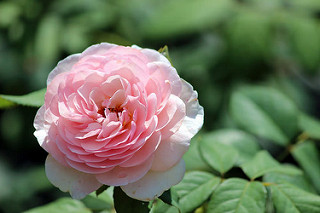

rose-train : 99.75969195365906
tulip-train : 0.20497487857937813
dandelion-train : 0.018396516679786146
daisy-train : 0.016582694661337882
sunflower-train : 0.00035882483189197956


In [35]:
image_path = os.path.join(execution_path, "flower\\test\\rose-test\\15699509054_d3e125286f_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

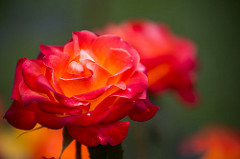

rose-train : 95.91997861862183
tulip-train : 4.0779925882816315
daisy-train : 0.001831076770031359
dandelion-train : 0.00013085846148896962
sunflower-train : 5.738320396631025e-05


In [36]:
image_path = os.path.join(execution_path, "flower\\test\\rose-test\\15811380728_5053455c50_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

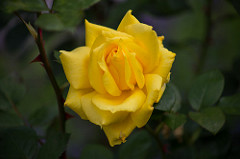

rose-train : 80.51493763923645
dandelion-train : 11.672821640968323
tulip-train : 6.999559700489044
sunflower-train : 0.5651251412928104
daisy-train : 0.2475510584190488


In [37]:
image_path = os.path.join(execution_path, "flower\\test\\rose-test\\15972975956_9a770ca9dd_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

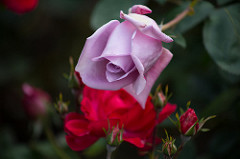

rose-train : 98.45470786094666
tulip-train : 1.542095374315977
daisy-train : 0.002746044992818497
dandelion-train : 0.0002905067276515183
sunflower-train : 0.0001576021077198675


In [38]:
image_path = os.path.join(execution_path, "flower\\test\\rose-test\\15996816031_7f2fea25cb_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

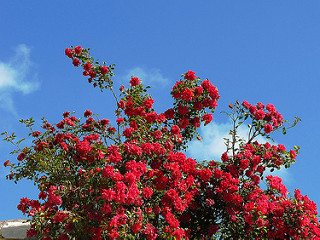

rose-train : 45.654088258743286
tulip-train : 45.48506736755371
sunflower-train : 7.424625009298325
daisy-train : 1.196394581347704
dandelion-train : 0.23983102291822433


In [39]:
image_path = os.path.join(execution_path, "flower\\test\\rose-test\\16152175716_55d6968e08_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

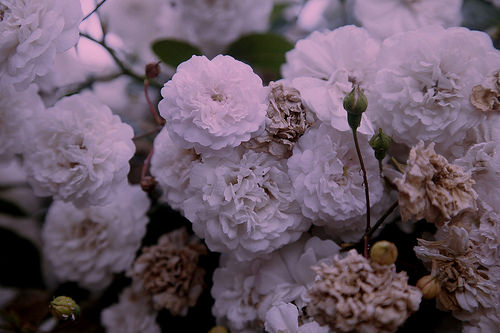

rose-train : 51.11507773399353
tulip-train : 38.82001042366028
dandelion-train : 5.913213267922401
daisy-train : 4.062695801258087
sunflower-train : 0.08900614338926971


In [40]:
image_path = os.path.join(execution_path, "flower\\test\\rose-test\\16078501836_3ac067e18a.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

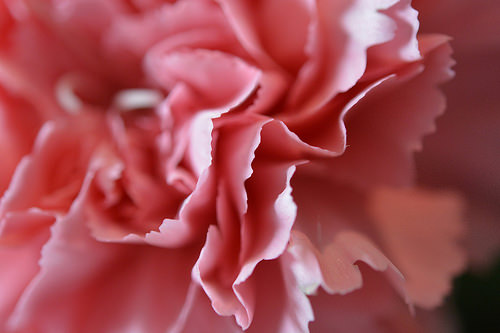

rose-train : 96.962571144104
tulip-train : 2.4012062698602676
daisy-train : 0.5772887263447046
dandelion-train : 0.04896237514913082
sunflower-train : 0.009978027082979679


In [41]:
image_path = os.path.join(execution_path, "flower\\test\\rose-test\\16476788181_0e2ffc719a.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

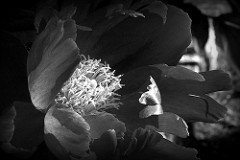

rose-train : 46.528419852256775
dandelion-train : 43.569040298461914
daisy-train : 5.0020139664411545
tulip-train : 4.85137440264225
sunflower-train : 0.04915024619549513


In [45]:
image_path = os.path.join(execution_path, "flower\\test\\rose-test\\18486123042_5c8da68f38_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

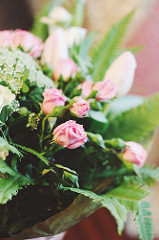

rose-train : 84.2960774898529
tulip-train : 13.412526249885559
daisy-train : 1.170834619551897
dandelion-train : 0.817832350730896
sunflower-train : 0.3027348080649972


In [43]:
image_path = os.path.join(execution_path, "flower\\test\\rose-test\\17104364030_ee31ee279b_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

### Tulips

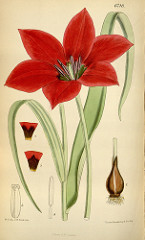

tulip-train : 97.7356493473053
rose-train : 1.7861276865005493
daisy-train : 0.4274125676602125
sunflower-train : 0.04980604280717671
dandelion-train : 0.0010064590242109261


In [46]:
image_path = os.path.join(execution_path, "flower\\test\\tulip-test\\14674388855_2da18e375a_m.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

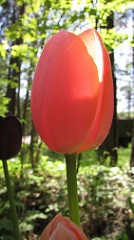

rose-train : 52.790284156799316
tulip-train : 37.86875605583191
sunflower-train : 9.189925342798233
daisy-train : 0.14269703533500433
dandelion-train : 0.008339856140082702


In [64]:
image_path = os.path.join(execution_path, "flower\\test\\tulip-test\\20742669999_53de71a4c9_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

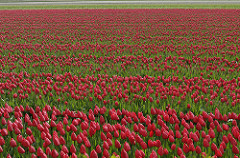

tulip-train : 97.02356457710266
sunflower-train : 1.7866913229227066
rose-train : 1.08187859877944
daisy-train : 0.09678294882178307
dandelion-train : 0.0110841472633183


In [65]:
image_path = os.path.join(execution_path, "flower\\test\\tulip-test\\26685647236_8211cb3e95_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

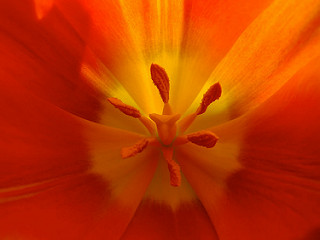

tulip-train : 78.67522835731506
rose-train : 21.314634382724762
daisy-train : 0.005059758404968306
sunflower-train : 0.004168160739936866
dandelion-train : 0.0009080380550585687


In [50]:
image_path = os.path.join(execution_path, "flower\\test\\tulip-test\\16930121391_a4092ecf00_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

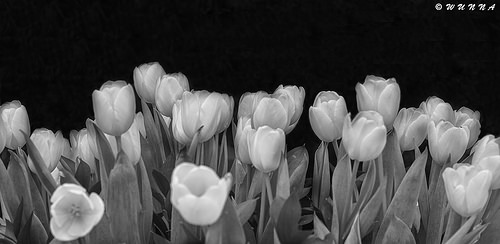

tulip-train : 99.33595061302185
daisy-train : 0.27161133475601673
rose-train : 0.26484369300305843
sunflower-train : 0.1142941415309906
dandelion-train : 0.01330509694525972


In [51]:
image_path = os.path.join(execution_path, "flower\\test\\tulip-test\\16986144192_55e0e6c152.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

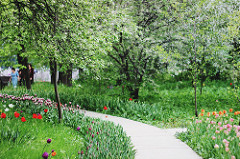

dandelion-train : 67.40148067474365
tulip-train : 27.767252922058105
daisy-train : 3.8189679384231567
rose-train : 0.9115384891629219
sunflower-train : 0.10075699537992477


In [53]:
image_path = os.path.join(execution_path, "flower\\test\\tulip-test\\17113203493_735185295f_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

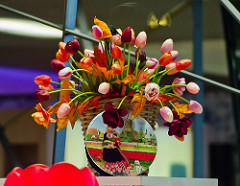

tulip-train : 64.22590613365173
rose-train : 33.67862105369568
sunflower-train : 1.8808621913194656
daisy-train : 0.21084211766719818
dandelion-train : 0.0037700760003644973


In [54]:
image_path = os.path.join(execution_path, "flower\\test\\tulip-test\\17408197905_829c4d7940_m.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

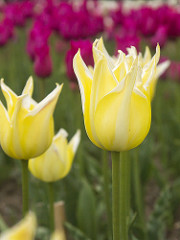

tulip-train : 96.40405178070068
rose-train : 2.3378055542707443
sunflower-train : 1.1382210068404675
daisy-train : 0.11695472057908773
dandelion-train : 0.002972676338686142


In [57]:
image_path = os.path.join(execution_path, "flower\\test\\tulip-test\\17970201501_6ee7401206_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

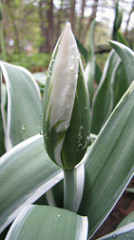

rose-train : 71.74434065818787
tulip-train : 16.785608232021332
dandelion-train : 7.32441172003746
daisy-train : 4.126168042421341
sunflower-train : 0.019475720182526857


In [59]:
image_path = os.path.join(execution_path, "flower\\test\\tulip-test\\19268907364_d94a846fc8_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

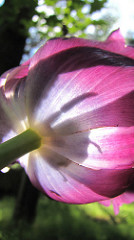

rose-train : 92.58650541305542
tulip-train : 7.250826060771942
daisy-train : 0.16088553238660097
sunflower-train : 0.001768763831933029
dandelion-train : 1.9018241914636747e-05


In [60]:
image_path = os.path.join(execution_path, "flower\\test\\tulip-test\\19689668684_15089ae2fa_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

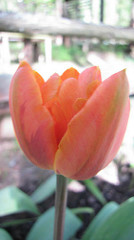

tulip-train : 83.0120861530304
rose-train : 13.414952158927917
daisy-train : 3.462875634431839
sunflower-train : 0.059009873075410724
dandelion-train : 0.05107701290398836


In [62]:
image_path = os.path.join(execution_path, "flower\\test\\tulip-test\\19693717158_af4afcffd2_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

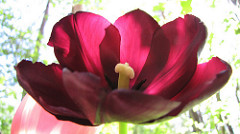

tulip-train : 74.60396885871887
rose-train : 25.278350710868835
sunflower-train : 0.1075209816917777
daisy-train : 0.01007333557936363
dandelion-train : 9.252102017853758e-05


In [63]:
image_path = os.path.join(execution_path, "flower\\test\\tulip-test\\20093649146_5a93a8f173_n.jpg")

predictions, probabilities = prediction.predictImage(image_path, result_count=5)

display(Image.open(image_path))
for eachPrediction, eachProbability in zip(predictions, probabilities):
    eachProb = str(eachProbability)
    print(eachPrediction + " : " + eachProb)

### What other datasets can I use?
Oxford University has two different datasets I can use. 
One has 17 different types of flowers, https://www.robots.ox.ac.uk/~vgg/data/flowers/17/index.html , 
and the other has 102 different types of flowers, https://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html.


### What other methods might I use?
I will likely look into useing Tensorflow instead of ImageAI, because ImageAI's code is not working at the moment. If I can't get the code to work then I will likely switch over. 

### How will I validate my results?
I plan on validating my results by printing out the likelihood of the correct flower. I.e having the program (which is what ImageIA does) print out the likelihood of each flower being the correct match. 

'daisy'  91.982383 

'sunflower'   7.2389283 

'rose'    1.211233

'tulip'   0.521122

'dandelion'    .4321382


And if the program is able to output the correct flower at a 90% rating or above then I will count that flower type's image recognition as being successful. If the flower percentage rating falls below 80% as the lowest then I will consider that flower's image recognition to be unsuccessful. If the rating is between 80% and 90% then I will consider that to be somewhat successful.


### Prototypeing 2

My hypothesis is that the algorithm will be able to detect a fair ammount of flowers in my database but I do think it might have some problems with the images that are not focused on the flowers and are more centered around other objects, like a rocking chair with the flower in the corner. 